# [CoE202] **[Homework1c]** Polynomial regression

In this section, you are going to implement polynomial regression algorithms using gradient descent.

### 0. Importing packages

For this assignment we need Numpy and Matplotlib.

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)

### 1. Introduction 
Given data points (x, y), we want to find non-linear estimator that fits well on the data. We are going to consider the only case when x and y are single dimension.

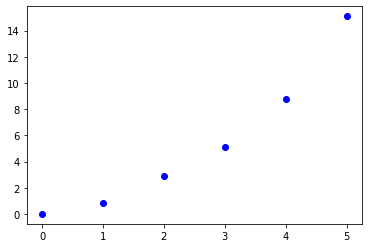

In [2]:
# data points
X = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0]) 
y = np.array([0.0, 0.8, 2.9, 5.1, 8.8, 15.1])

# plot data
plt.plot(X, y, 'bo')

### 2. Polynomial regression with gradient descent



In [3]:
def poly_features(X, K):
    """Compute the feature matrix Phi

    Arguments:
      X: input data of size N vector
      K: degree of the polynomial
    
    Returns:
      Phi: feature matrix of size N x (K + 1)
    """
    # [Problem 1] returns feature matrix Phi from input and degree of the polynomial
    # HINT: np.vander to generate a Vandermonde matrix.
    Phi = np.vander(X, K+1, increasing=True)

    return Phi

def vectorize_y(y):
    y_vec = y.reshape(-1, 1) 
    return y_vec

In [4]:
K = 2
Phi = poly_features(X, K)
y_vec = vectorize_y(y)

print(Phi)
print(y_vec)

[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]
[[ 0. ]
 [ 0.8]
 [ 2.9]
 [ 5.1]
 [ 8.8]
 [15.1]]


In [5]:
# polynomial fitting (2nd order polynomial fitting)
# linear fitting using gradient descent
def np_linear_regression_gd(Phi, y_vec):
    """Compute the coefficients by gradient descent polynomial fitting.

    Arguments:
      Phi: feature matrix of size N x (K + 1)
      y_vec: training targets of size N x 1
    
    Returns:
      theta = coefficients of the polynomial function.
    """
    alpha = 0.003             # learning rate
    num_iter = 5000           # number of iterations
    N, D = Phi.shape
    theta = np.zeros((D, 1))  # initialize theta
    
    # iteratively apply gradient descent
    for i in range(num_iter):
        # [Problem 2] Calculate gradient grad_L, from Phi, theta and y_vec
        # calculate gradients
        grad_L = 0.5 * Phi.T @ (Phi @ theta - y_vec)

        # [Problem 3] Update theta by alpha and grad_L
        # update theta
        theta = theta - alpha * grad_L
  
    return theta          

### 3. Testing algorithms.

[[ 0.20261141]
 [-0.12017892]
 [ 0.60520584]]


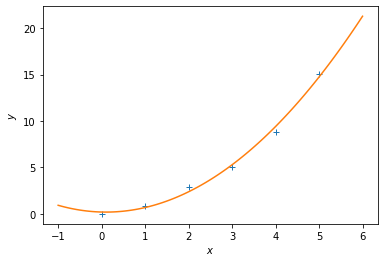

In [6]:
# get coefficients 
theta_ml = np_linear_regression_gd(Phi, y_vec)
print(theta_ml)

# test inputs
Xtest = np.linspace(-1,6,100)

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");